## Problem 1: Prinicipal Component analysis of an Image

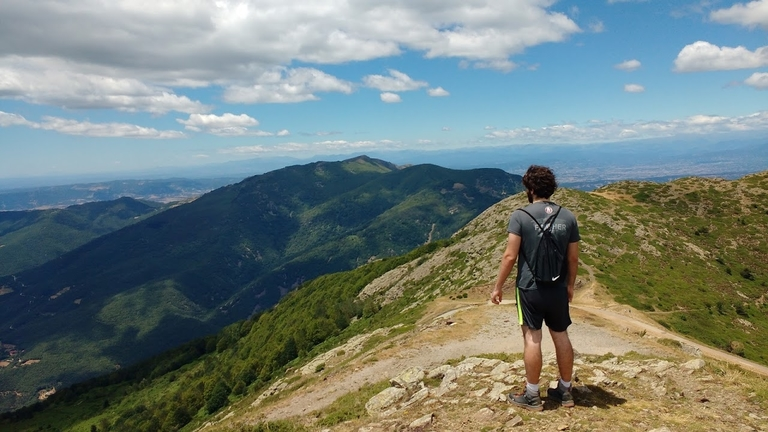

## The provided image is of resolution 432 x 768 and each instance has triplet values comprising of the RGB color representations

## We will be using PCA to reduce the 768 column values into first 100 components, 200, 300 components etc, to observe the image compression 

- To begin with we need to normalize the rgb values by splitting them into individual channels and normalizing them by dividing them by max values of 255 and zero centering
- Then we calculate the covariance for the centered value
- We then perform the Eigen Value Decomposition and sort the results
- Then we calculate the Reduced dimension matrix for the image by performing dot product with the Dimension

### References: 
- https://www.askpython.com/python/examples/principal-component-analysis-for-image-data
- https://glowingpython.blogspot.com/2011/07/pca-and-image-compression-with-numpy.html
- AssemblyAI explanation: https://www.youtube.com/watch?v=Rjr62b_h7S4

In [1]:
import os
import seaborn as sns
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [2]:
DataPic = 'PCA_Image.jpeg'
dirpath = '..\hw3_group20_Dhonukshe_Kokane_Srinivasan\Resources'
Img = img.imread(os.path.join(dirpath,DataPic))

In [3]:
class ImageCompressionPCA:
    def __init__(self, ImgDir, ImgName, PrintShapes=False,Debug=False,SampleIndex = [0,10]):
        self.SampleL = SampleIndex[0]
        self.SampleR = SampleIndex[1]
        self.Imgpath = os.path.join(ImgDir,ImgName)
        self.ImgObj = img.imread(self.Imgpath)
        
        self.RawR,self.RawG,self.RawB = None,None,None
        
        self.PrintShapes = PrintShapes
        self.Debug = Debug
        
        
    def __repr__(self):
        print("Image shape = ",self.ImgObj.shape)
        plt.imshow(self.ImgObj)
        return "The provided raw data is plotted below"
    
    def combineRGB(self,R,G,B):
        self.FinalImg = dstack((R,G,B)).astype(uint8)
        return self.FinalImg
    
    @property
    def display(self):
        plt.imshow(self.FinalImg)
    
    @property
    def ColourSplitandNorm(self):
        self.RawR,self.RawG,self.RawB = self.ImgObj[:,:,0], self.ImgObj[:,:,1], self.ImgObj[:,:,2]
        
        if self.PrintShapes : print("/-------------RGB splitting Results-------------/")
        if self.PrintShapes: print(f"Shapes of Raw input color matrices, R = {self.RawR.shape}, G = {self.RawG.shape}, B = {self.RawB.shape}\n" )
        if self.Debug: print(f"Sample from Mean matrices\n \nR = {self.RawR[self.SampleL:self.SampleR]}\n \nG = {self.RawG[self.SampleL:self.SampleR]} \n \nB = {self.RawB[self.SampleL:self.SampleR]}\n" )
        
        self.NormR,self.NormG,self.NormB = self.RawR/255,self.RawG/255,self.RawB/255
        
        if self.PrintShapes : print("/-------------RGB Standardization Results-------------/")
        if self.PrintShapes: print(f"Shapes of Standardized input color matrices, R = {self.NormR.shape}, G = {self.NormG.shape}, B = {self.NormB.shape}\n" )
        if self.Debug: print(f"Sample from Standardized input color matrices\n \nR = {self.NormR[self.SampleL:self.SampleR]}\n \nG = {self.NormG[self.SampleL:self.SampleR]} \n \nB = {self.NormB[self.SampleL:self.SampleR]}\n" )
        
        self.ZeroMeanR,self.ZeroMeanG,self.ZeroMeanB = self.NormR-mean(self.NormR,axis=0),self.NormG-mean(self.NormG,axis=0),self.NormB-mean(self.NormB,axis=0) 
        
        if self.PrintShapes : print("/-------------RGB Normalization Results-------------/")
        if self.PrintShapes: print(f"Shapes of Normalized input color matrices, R = {self.ZeroMeanR.shape}, G = {self.ZeroMeanG.shape}, B = {self.ZeroMeanB.shape}\n" )
        if self.Debug: print(f"Sample from Normalized input color matrices\n \nR = {self.NormR[self.ZeroMeanR:self.SampleR]}\n \nG = {self.ZeroMeanG[self.SampleL:self.SampleR]} \n \nB = {self.ZeroMeanB[self.SampleL:self.SampleR]}\n" )
        
    @property
    def EigenDecomp(self):
        self.CovarR,self.CovarG,self.CovarB = cov(self.ZeroMeanR,rowvar=False),cov(self.ZeroMeanG,rowvar=False),cov(self.ZeroMeanB,rowvar=False)
        
        if self.PrintShapes : print("/-------------Covariance Matrix Results-------------/")
        if self.PrintShapes : print(f"Shapes of Covariance matrices, R = {self.CovarR.shape}, G = {self.CovarG.shape}, B = {self.CovarB.shape}\n" )
        if self.Debug: print(f"Sample from Covariance matrices\n \nR = {self.CovarR[self.SampleL:self.SampleR]}\n \nG = {self.CovarG[self.SampleL:self.SampleR]} \n \nB = {self.CovarB[self.SampleL:self.SampleR]}\n" )
        
        self.RedEigenvals,self.RedEigenvecs = linalg.eigh(self.CovarR)
        self.GreenEigenvals,self.GreenEigenvecs = linalg.eigh(self.CovarG)
        self.BlueEigenvals,self.BlueEigenvecs = linalg.eigh(self.CovarB)
        
        if self.PrintShapes : print("/-------------Eigen Values -------------/")
        if self.PrintShapes : print(f"Shapes of Eigen Values, R = {self.RedEigenvals.shape}, G = {self.GreenEigenvals.shape}, B = {self.BlueEigenvals.shape}\n" )
        if self.Debug: print(f"Sample from Eigen Values \n \nR = {self.RedEigenvals[self.SampleL:self.SampleR]}\n \nG = {self.GreenEigenvals[self.SampleL:self.SampleR]} \n \nB = {self.BlueEigenvals[self.SampleL:self.SampleR]}\n" )
        
        if self.PrintShapes : print("/-------------Eigen Vectors -------------/")
        if self.PrintShapes : print(f"Shapes of Eigen Vectors, R = {self.RedEigenvecs.shape}, G = {self.GreenEigenvecs.shape}, B = {self.BlueEigenvecs.shape}\n" )
        if self.Debug: print(f"Sample from Eigen Vectors\n \nR = {self.RedEigenvecs[self.SampleL:self.SampleR]}\n \nG = {self.GreenEigenvecs[self.SampleL:self.SampleR]} \n \nB = {self.BlueEigenvecs[self.SampleL:self.SampleR]}\n" )
        
        ## Reference for sorting: https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt
        self.EigValSortIdxR = [argsort(self.RedEigenvals)[::-1],argsort(self.GreenEigenvals)[::-1],argsort(self.BlueEigenvals)[::-1]]
        
        self.SortedRedEigenvals,self.SortedGreenEigenvals,self.SortedBlueEigenvals =  self.RedEigenvals[self.EigValSortIdxR[0]],self.GreenEigenvals[self.EigValSortIdxR[1]],self.BlueEigenvals[self.EigValSortIdxR[2]]
        self.SortedRedEigenvecs,self.SortedGreenEigenvecs,self.SortedBlueEigenvecs =  self.RedEigenvecs[:,self.EigValSortIdxR[0]],self.GreenEigenvecs[:,self.EigValSortIdxR[1]],self.BlueEigenvecs[:,self.EigValSortIdxR[2]]
        
        self.RedEigenValSum,self.GreenEigenValSum,self.BlueEigenValSum = self.SortedRedEigenvals.sum(),self.SortedGreenEigenvals.sum(),self.SortedBlueEigenvals.sum()
        
        self.ExplainedVarR,self.ExplainedVarG,self.ExplainedVarB = [(Eigen/self.RedEigenValSum)*100 for Eigen in self.SortedRedEigenvals],[(Eigen/self.GreenEigenValSum)*100 for Eigen in self.SortedGreenEigenvals],[(Eigen/self.BlueEigenValSum)*100 for Eigen in self.SortedBlueEigenvals]
        
        if self.PrintShapes : print("/-------------Sorted Eigen Values -------------/")
        if self.PrintShapes : print(f"Shapes of Sorted Eigen Values, R = {self.SortedRedEigenvals.shape}, G = {self.SortedGreenEigenvals.shape}, B = {self.SortedBlueEigenvals.shape}\n" )
        if self.Debug: print(f"Sample from Sorted Eigen Values \n \nR = {self.SortedRedEigenvals[self.SampleL:self.SampleR]}\n \nG = {self.SortedGreenEigenvals[self.SampleL:self.SampleR]} \n \nB = {self.SortedBlueEigenvals[self.SampleL:self.SampleR]}\n" )
        
        if self.PrintShapes : print("/-------------Sorted Eigen Vectors -------------/")
        if self.PrintShapes : print(f"Shapes of Sorted Eigen Vectors, R = {self.RedEigenvecs.shape}, G = {self.GreenEigenvecs.shape}, B = {self.BlueEigenvecs.shape}\n" )
        if self.Debug: print(f"Sample from Sorted Eigen Vectors\n \nR = {self.RedEigenvecs[self.SampleL:self.SampleR]}\n \nG = {self.GreenEigenvecs[self.SampleL:self.SampleR]} \n \nB = {self.SortedBlueEigenvecs[self.SampleL:self.SampleR]}\n" )
        
    def ImageReduce(self,ReducedDim):

        self.RedNEigVal = self.SortedRedEigenvals[:ReducedDim]
        self.GreenNEigVal = self.SortedGreenEigenvals[:ReducedDim]
        self.BlueNEigVal = self.SortedBlueEigenvals[:ReducedDim]
        
        self.RedNEigVec = self.SortedRedEigenvecs[:,0:ReducedDim]
        self.GreenNEigVec = self.SortedGreenEigenvecs[:,0:ReducedDim]
        self.BlueNEigVec = self.SortedBlueEigenvecs[:,0:ReducedDim]
    
        self.NImgR,self.NImgG,self.NImgB = dot(self.RedNEigVec.T,self.ZeroMeanR.T).T,dot(self.GreenNEigVec.T,self.ZeroMeanG.T).T,dot(self.BlueNEigVec.T,self.ZeroMeanB.T).T
        
        if self.PrintShapes : print(f"/-------------Image reduced to {ReducedDim} Dimensions -------------/")
        if self.PrintShapes : print(f"Shapes of Reduced Image, R = {self.NImgR.shape}, G = {self.NImgG.shape}, B = {self.NImgB.shape}\n" )
        if self.Debug: print(f"Sample from Reduced Image\n \nR = {self.NImgR[self.SampleL:self.SampleR]}\n \nG = {self.NImgG[self.SampleL:self.SampleR]} \n \nB = {self.NImgB[self.SampleL:self.SampleR]}\n" )
    
    @property        
    def InverseTransform(self):
        self.FinalImgR = dot(self.RedNEigVec,self.NImgR.T).T
        self.FinalImgG = dot(self.GreenNEigVec,self.NImgG.T).T
        self.FinalImgB = dot(self.BlueNEigVec,self.NImgB.T).T
        
        self.FinalImgR += mean(self.NormR,axis=0)
        self.FinalImgG += mean(self.NormG,axis=0)
        self.FinalImgB += mean(self.NormB,axis=0)
        
        self.FinalImgR *= 255
        self.FinalImgG *= 255
        self.FinalImgB *= 255
    
    @property
    def explained_variance(self):
        
        fig,ax = plt.subplots(3,2,figsize=(10,15), layout="tight")
        Accumulated_VarianceR,Accumulated_VarianceG,Accumulated_VarianceB = cumsum(self.ExplainedVarR),cumsum(self.ExplainedVarG),cumsum(self.ExplainedVarB)
        ylim = len(self.ExplainedVarR)
        maxR,maxG,maxB = int(max(self.ExplainedVarR)),int(max(self.ExplainedVarR)),int(max(self.ExplainedVarB))
        r=[maxR,maxG,maxB]
        _95point = [i for i,x in enumerate(Accumulated_VarianceR) if 94.5<=x<=95 ][-1]
        
        #_______________ Red Explained Variance_______________________#
        ax[0,0].bar(range(0,ylim), self.ExplainedVarR,align='center',label='Explained Variance for Red channel',color = 'navy')
        ax[0,1].step(range(0,ylim), Accumulated_VarianceR,label='Cumulative variance for red channel',color = 'red')
        ax[0,0].axvline(x=_95point, color='green', ls='-.', alpha=0.7, label='Line marking 95% variance captured')
        ax[0,1].axvline(x=_95point, color='green', ls='-.', alpha=0.7, label='Line marking 95% variance captured')
        
        #_______________ Green Explained Variance_______________________#
        ax[1,0].bar(range(0,ylim), self.ExplainedVarG,align='center',label='Explained Variance for Green channel',color = 'navy')
        ax[1,1].step(range(0,ylim), Accumulated_VarianceG,label='Cumulative variance for Green channel',color = 'green')
        ax[1,0].axvline(x=_95point, color='blue', ls='-.', alpha=0.7, label='Line marking 95% variance captured')
        ax[1,1].axvline(x=_95point, color='blue', ls='-.', alpha=0.7, label='Line marking 95% variance captured')
        
        #_______________ Blue Explained Variance_______________________#
        ax[2,0].bar(range(0,ylim), self.ExplainedVarB,align='center',label='Explained Variance for Blue channel',color = 'navy')
        ax[2,1].step(range(0,ylim), Accumulated_VarianceB,label='Cumulative variance for Blue channel',color = 'blue')
        ax[2,0].axvline(x=_95point, color='red', ls='-.', alpha=0.7, label='Line marking 95% variance captured')
        ax[2,1].axvline(x=_95point, color='red', ls='-.', alpha=0.7, label='Line marking 95% variance captured')
        i=0
        for axr in ax.flat:
            axr.set(xlabel='Cumulative variance explained', ylabel='PCA components')
            if i%2==0:
                axr.set_ylim([0,8], auto=False)
            i+=1
        plt.show()

    def MultiPlot(self,Nvals):
        Images = list()
        c=int(len(Nvals)**0.5)
        r= len(Nvals)-c
        for dex,comp in enumerate(Nvals):
            self.ImageReduce(comp)
            self.InverseTransform
            TempImg = self.combineRGB(self.FinalImgR,self.FinalImgG,self.FinalImgB)
            Images.append(TempImg)
            
        #Dynamic subplots reference = https://stackoverflow.com/questions/12319796/dynamically-add-create-subplots-in-matplotlib
        loc = range(1,len(Nvals) + 1)
        fig = plt.figure(1,figsize=(10,15))
        i=0
        for k in range(len(Nvals)):
            ax = fig.add_subplot(r,c,loc[k])
            ax.set_title('PC count='+str(Nvals[i]))
            ax.imshow(Images[i])
            i +=1
        plt.tight_layout()
        plt.show()
        
        


In [4]:
DataPic = 'PCA_Image.jpeg'
dirpath = '..\hw3_group20_Dhonukshe_Kokane_Srinivasan\Resources'

In [5]:
Img = ImageCompressionPCA(dirpath,DataPic)
Img.ColourSplitandNorm
Img.EigenDecomp

In [6]:
Img.ImageReduce(20)
Img.InverseTransform
Final_Image = Img.combineRGB(Img.FinalImgR,Img.FinalImgG,Img.FinalImgB)

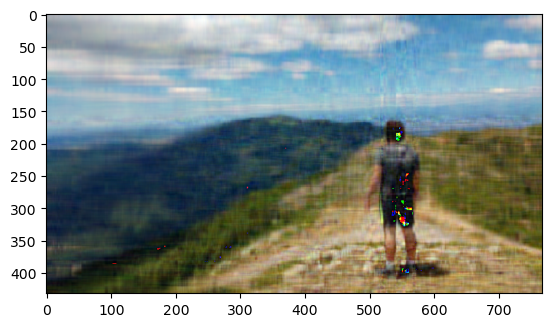

In [7]:
plt.imshow(Final_Image)

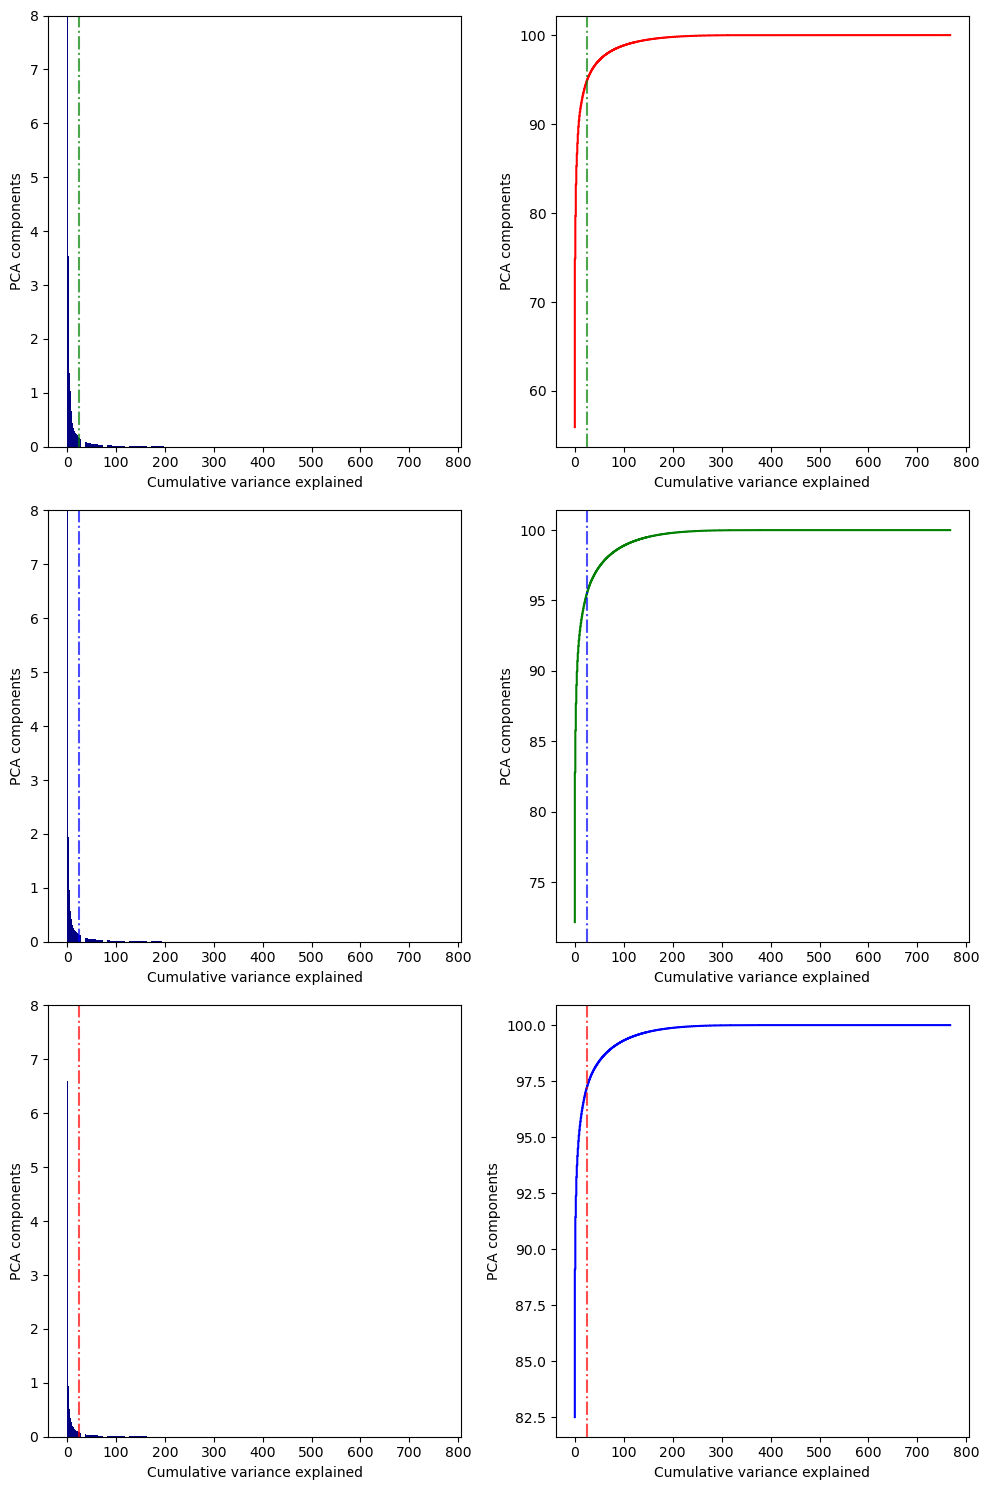

In [8]:
Img.explained_variance

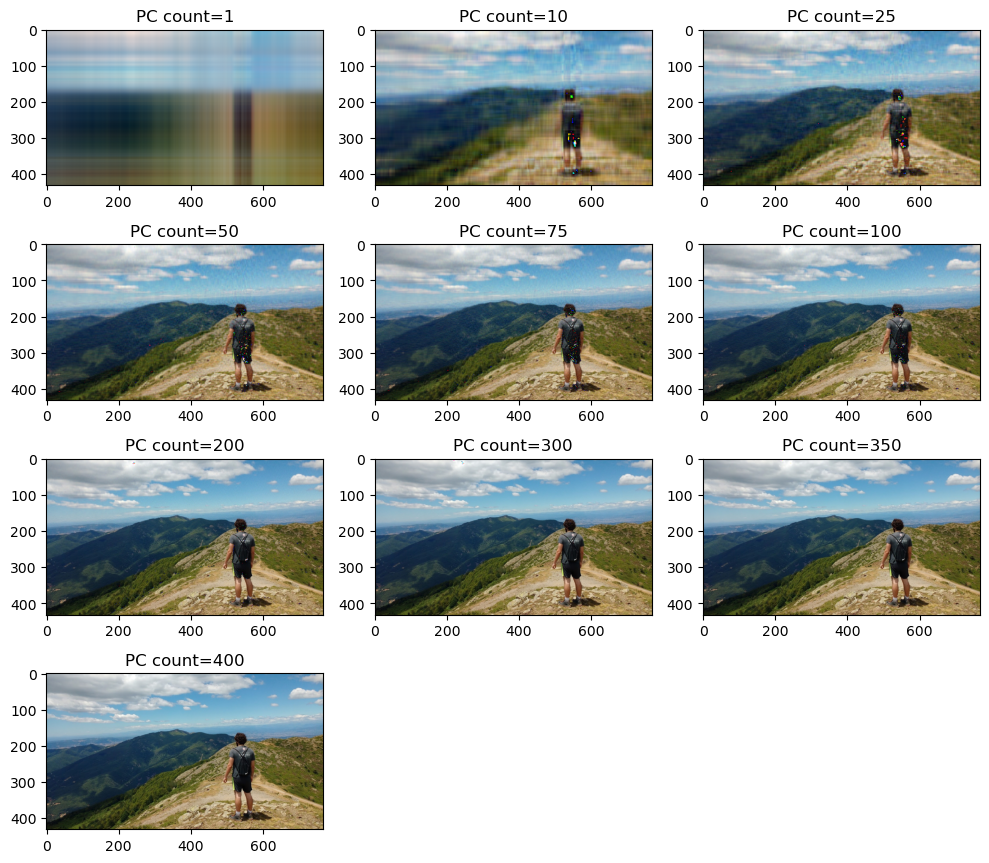

In [9]:
Img.MultiPlot([1,10,25,50,75,100,200,300,350,400])

# Conclusion
### By performing PCA on the given image we can reduce the initial 432 x 768 image with 25 Principal Components and retain 95% of the variance and reconstruct the image as below
### The above plots show the different image reconstructions for different PC counts

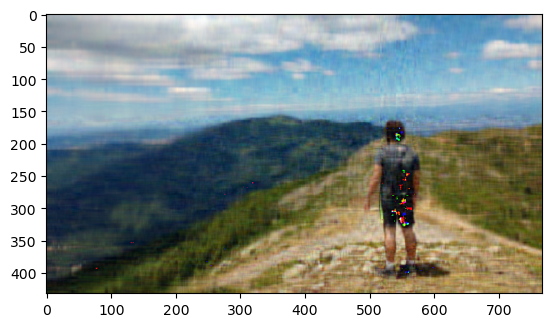

In [10]:
Img.ImageReduce(25)
Img.InverseTransform
Final_Image = Img.combineRGB(Img.FinalImgR,Img.FinalImgG,Img.FinalImgB)
plt.imshow(Final_Image)

In [27]:
import pandas as pd
import numpy as np


# Reading the Dataset

Adding column names beacuse data is missing column

In [28]:
columns = ['names', 'label']
us = pd.read_csv(os.path.join(dirpath,'us.txt'),names = columns )

In [29]:
us.head()

,names,label
0,Timothy Moses,NaN
1,Anna Barajas,NaN
2,James Caldwell,NaN
3,Mr. Michael Cole,NaN
4,Jeffrey Collier,NaN


### Doing the same with every language file

In [30]:
japan = pd.read_csv(os.path.join(dirpath,'japan.txt'),names = columns)
greek = pd.read_csv(os.path.join(dirpath,'greek.txt'),names = columns)
arabic = pd.read_csv(os.path.join(dirpath,'arabic.txt'),names = columns)

### Adding labels manually to every language dataset

In [31]:
label = ['us']*len(us)

In [32]:
us['label'] = label

In [33]:
us.head()

,names,label
0,Timothy Moses,us
1,Anna Barajas,us
2,James Caldwell,us
3,Mr. Michael Cole,us
4,Jeffrey Collier,us


In [34]:
label1 = ['japan']*len(japan)
label2 = ['greek']*len(greek)
label3 = ['arabic']*len(arabic)
japan['label'] = label1
greek['label'] = label2
arabic['label'] = label3

### Combining all 4 languages to create a single dataframe

In [35]:
finalnames = pd.concat([us,japan,greek,arabic],axis = 0,ignore_index = True)

### Checking for null or irrelevant data

In [36]:
finalnames.shape
finalnames.isnull().sum()

names    0
label    0
dtype: int64

# Spliting dataset into 70 % train and 30 % test

In [37]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(finalnames,test_size = 0.3)

In [38]:
train.shape

(3600, 2)

# Function for Naive Bayes classifier

Preprocessing function to split names into words

In [39]:
import string
def preprocess(line):
    words = line.strip().split(" ")
    #print(words)
    return words

### Function for calculating Naive Bayes probability and predicting on test dataset

We are using the parameter estimation formula in the given resources in order to implement Naive Bayes classifier 


In [40]:
import math
def result(sentence,vals):

    us_words,arabic_words,japan_words,greek_words = vals[0],vals[1],vals[2],vals[3]
    us_names,arabic_names,japan_names,greek_names = vals[4],vals[5],vals[6],vals[7]
    total_us_words,total_arabic_words,total_japan_words,total_greek_words = vals[8],vals[9],vals[10],vals[11]
    list_words = preprocess(sentence)
    p_us,p_arabic,p_japan,p_greek = 0,0,0,0
    total_us_words += len(us_words)*0.3
    total_arabic_words += len(arabic_words)* 0.3
    total_japan_words += len(japan_words)* 0.3
    total_greek_words += len(greek_words)* 0.3

    for word in list_words:
        fus = 0
        if word in us_words.keys():fus = us_words[word]
        farab = 0
        if word in arabic_words.keys():farab = arabic_words[word]
        fjap = 0
        if word in japan_words.keys():fjap = japan_words[word]
        fgreek = 0
        if word in greek_words.keys():fgreek = greek_words[word]

        p_us += math.log2((0.3 + fus)/total_us_words)
        p_arabic += math.log2((0.3 + farab)/total_arabic_words)
        p_japan += math.log2((0.3 + fjap)/total_japan_words)
        p_greek += math.log2((0.3 + fgreek)/total_greek_words)
    
    total = us_names + arabic_names + japan_names + greek_names
    usa = us_names/(total) 
    arabica = arabic_names/(total) 
    japana = japan_names/(total) 
    greeka = greek_names/(total)
    
    p_us += math.log2(usa)
    p_arabic += math.log2(arabica)
    p_japan += math.log2(japana)
    p_greek += math.log2(greeka)

    maxx = max(p_us,p_arabic, p_japan,p_greek)

    if maxx == p_us:return 'us'
    elif maxx == p_arabic:return 'arabic'
    elif maxx == p_japan:return 'japan'
    elif maxx == p_greek:return 'greek'


## Function to preprocess dataset and generate vocabulary

We have used dictionaries in order to create a vocabulary for the names 

In [41]:
def classifier(train_data, test_data):

    us_words,arabic_words,greek_words,japan_words = {},{},{},{}
    us_names,arabic_names,japan_names,greek_names = 0,0,0,0
    total_us_words,total_arabic_words,total_japan_words,total_greek_words = 0,0,0,0

    for i in range(len(train)):
        processed_words = preprocess(train_data['names'].iloc[i])
        #print(processed_words)
        if train_data['label'].iloc[i] == 'us':
            us_names += 1
            total_us_words += len(processed_words)
            for j in processed_words:
                if j not in us_words:us_words[j] = 1
                else:us_words[j] += 1

        elif train_data['label'].iloc[i] == 'arabic':
            arabic_names += 1
            total_arabic_words += len(processed_words)
            for j in processed_words:
                if j not in arabic_words:arabic_words[j] = 1
                else:arabic_words[j] += 1

        elif train_data['label'].iloc[i] == 'greek':
            greek_names += 1
            total_greek_words += len(processed_words)
            for j in processed_words:
                if j not in greek_words:greek_words[j] = 1
                else:greek_words[j] += 1

        else:
            japan_names += 1
            total_japan_words += len(processed_words)
            for j in processed_words:
                if j not in japan_words:japan_words[j] = 1
                else:japan_words[j] += 1

    
    vals = []
    vals.append(us_words)
    vals.append(arabic_words)
    vals.append(japan_words)
    vals.append(greek_words)

    vals.append(us_names)
    vals.append(arabic_names)    
    vals.append(japan_names)
    vals.append(greek_names)

    vals.append(total_us_words)
    vals.append(total_arabic_words)
    vals.append(total_japan_words)
    vals.append(total_greek_words)

    res = []

    for i in range(len(test)):
        ans = result(test_data['names'].iloc[i],vals)
        res.append(ans)

    return res
    

# Calculating accuracy of the Model

In [42]:
results= classifier(train, test)

correct_ct = sum([ (results[i] == test['label'].iloc[i]) for i in range(0, len(test)) ])
print("Classification accuracy = %5.2f%%" % (100.0 * correct_ct / len(test)))


Classification accuracy = 92.50%
